In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

## Functions and stuff

In [4]:
class preProc():

    def __init__(self):
        self.image_list = []
        self.roi = np.empty([1,1])

    def list_files(self, dir, fileformat = ".png"):
        r = []
        for root, dirs, files in os.walk(dir):
            for name in files:
                if name.endswith(fileformat):
                    self.image_list.append(os.path.join(root, name))
        return self.image_list

    def nonDepth(list):
        
        return

pp = preProc()

## Loading the image in and cropping

(640, 640, 3)


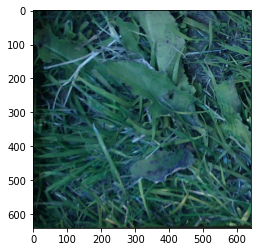

In [5]:
dir = "/home/bbejczy/repos/GALIROOT/data/l515_imgs/"
images = pp.list_files(dir)

img = cv2.imread(images[7])
# pp.roi = img[365:1000 , 340:1120]
pp.roi = img[360:1000, 340:980]
print(pp.roi.shape)
hsv_roi = cv2.cvtColor(pp.roi, cv2.COLOR_BGR2HSV)
plt.imshow(pp.roi)


## Odd input for maxpool

Testing ```ceil_mode=True``` creates a value of the last coloumns/rows even if not all entries of the kernel all filled.

In [4]:
import torch.nn as nn
import torch

x = torch.randn(1,3,37,46)
# x = torch.tensor([[1,1,1,1,1], [1,2,2,2,1], [1,2,3,2,1], [1,2,2,2,1], [1,1,1,1,1]]).float()
# x = x.unsqueeze(0)
y_1 = nn.MaxPool2d(kernel_size=2,stride=2, padding=0)
y_2 = nn.MaxPool2d(kernel_size=2,stride=2, padding=0, ceil_mode=True)
conv = nn.Conv2d(3,32,1)
print(x.shape)
print(y_1(conv(x)).shape)
print(y_2(conv(x)).shape)

torch.Size([1, 3, 37, 46])
torch.Size([1, 32, 18, 23])
torch.Size([1, 32, 19, 23])


In [5]:
%load_ext autoreload
%autoreload 2

In [46]:
import matplotlib.pyplot as plt
import loader
from models import Net
import torch
from torchvision import transforms
from torchvision.transforms import ToTensor
from albumentations.pytorch.transforms import ToTensorV2
import torch.nn as nn
from pathlib import Path
import numpy as np
import albumentations as albu

img = '/home/bbejczy/repos/GALIROOT/data/20200809_skaevinge_pruned/img/'
ann = '/home/bbejczy/repos/GALIROOT/data/20200809_skaevinge_pruned/ann/'
model = '/home/bbejczy/repos/GALIROOT/models/baseline_v1.pt'


data_transform = albu.Compose([
    ToTensorV2(),
    albu.Resize(256, 256),
    albu.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5)),
    ],
    keypoint_params=albu.KeypointParams(format='xy'),
)

# TODO: solve the missing keypoint conversion to tensor

print(data_transform)
Dataset = loader.KeypointsDataset(img_dir=Path(img), annotations_dir=Path(ann), transform=data_transform)


data_load = torch.utils.data.DataLoader(
    Dataset
)




def show_keypoints(image, key_pts, pred = None):
    """Show image with keypoints"""
    image = transforms.ToPILImage()(image).convert('RGB')
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')
    if pred is not None:
        plt.scatter(pred[:, 0], pred[:, 1], s=20, marker='.', c='b')


Compose([
  Resize(always_apply=False, p=1, height=256, width=256, interpolation=1),
  Normalize(always_apply=False, p=1.0, mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5), max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params={'format': 'xy', 'label_fields': None, 'remove_invisible': True, 'angle_in_degrees': True, 'check_each_transform': True}, additional_targets={})


Image values tensor([[[-0.9608, -0.9922, -0.9529,  ..., -0.7804, -0.8353, -0.7725],
         [-0.9843, -0.9216, -0.9216,  ..., -0.8196, -0.9059, -0.7725],
         [-0.8196, -0.8824, -0.8588,  ..., -0.7804, -0.9059, -0.7725],
         ...,
         [-0.9608, -0.9294, -0.9608,  ..., -0.8275, -0.8196, -0.7882],
         [-0.8980, -0.9529, -0.8667,  ..., -0.8510, -0.8510, -0.7882],
         [-0.9373, -0.8353, -0.7255,  ..., -0.8667, -0.8275, -0.7961]],

        [[-0.8980, -0.9294, -0.8824,  ..., -0.3412, -0.4824, -0.5294],
         [-0.9529, -0.8353, -0.8353,  ..., -0.3882, -0.5373, -0.5608],
         [-0.6863, -0.7255, -0.7490,  ..., -0.3961, -0.5922, -0.5765],
         ...,
         [-0.8431, -0.8118, -0.8431,  ..., -0.7725, -0.7569, -0.7412],
         [-0.7725, -0.8275, -0.7255,  ..., -0.8118, -0.8039, -0.7176],
         [-0.8039, -0.7020, -0.5686,  ..., -0.8196, -0.7882, -0.7412]],

        [[-0.8431, -0.8745, -0.8039,  ..., -0.4118, -0.5451, -0.5922],
         [-0.9608, -0.8353, -0.7

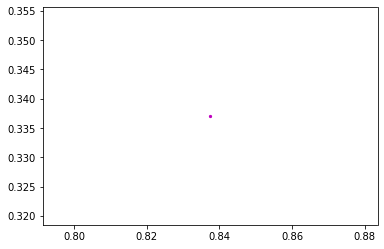

In [81]:
rand_i = np.random.randint(0, len(data_load))
sample = Dataset[rand_i]
print("Stem: ", sample['keypoint'])

show_keypoints(sample['image'], sample['keypoint'])